# Visualize waveforms generated for the AWG

This notebook is used to quickly visualize waveforms that are uploaded to the AWG. Figures generated here can also be saved and used in publication supplementary.

Dinesh Pinto (d.pinto@fkf.mpg.de)

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Enter name of pkl file without channel names
waveform_name = 'something' 
folder = os.path.join("C:\\", "qudi-hira", "saved_pulsed_assets", "waveform")

In [ ]:
os.listdir(folder)

"a_ch2" is a null channel.
"a_ch3" is a null channel.
"d_ch0" is a null channel.
"d_ch1" is a null channel.
"d_ch2" is a null channel.
"d_ch3" is a null channel.
"d_ch4" is a null channel.
"d_ch5" is a null channel.


<IPython.core.display.Javascript object>


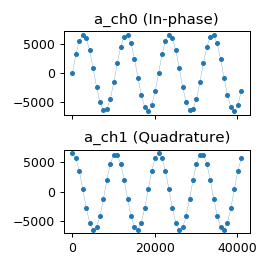

In [4]:
%matplotlib notebook

keys = ['a_ch0', 'a_ch1', 'a_ch2', 'a_ch3', 'd_ch0', 'd_ch1', 'd_ch2', 'd_ch3', 'd_ch4', 'd_ch5']
labels = {
    'a_ch0': "In-phase", 
    'a_ch1': "Quadrature", 
    'a_ch2': "", 
    'a_ch3': "", 
    'd_ch0': "Laser", 
    'd_ch1': "Readout", 
    'd_ch2': "Switch", 
    'd_ch3': "", 
    'd_ch4': "", 
    'd_ch5': ""
}

# Initialize all channels to None
channels = dict.fromkeys(keys, None) 

for key in list(channels):
    try:
        filename = f"{waveform_name}_{key}.pkl"
        filepath = os.path.join(folder, filename)
        with open(filepath, 'rb') as f:
            channels[key] = pickle.load(f)
        if not np.any(channels[key]):
            # Delete channels with only zeros
            print(f'"{key}" is a null channel.')
            del channels[key]  
    except FileNotFoundError as exc:
        # Delete channels that don't exist on disk
        print(exc) 
        del channels[key]


if len(channels) == 1: # Single channel plotting
    size_x, size_y = 8, 5
else:
    size_x, size_y = len(channels) * 1.5, len(channels) * 1.5

fig, ax = plt.subplots(nrows=len(channels), sharex=True, figsize=(size_x, size_y))

# Correct for matplotlib's (silly) behavior for single plots
if not isinstance(ax, np.ndarray): 
    ax = [ax]

    
limit = -50

for idx, key in enumerate(channels):
    time_in_us = np.linspace(0, len(channels[key][:limit]) / 1.25e9, len(channels[key][limit:])) * 1e6
    #time_in_us = np.linspace(0, len(channels[key][:limit]), len(channels[key][:limit]))
    
    if key.startswith('a_'):
        ax[idx].plot(time_in_us, channels[key][limit:], ".-", linewidth=0.2, color="C0")
    elif key.startswith('d_ch1'):
        ax[idx].plot(time_in_us, channels[key][limit:], "-", linewidth=0.2, color="C0")
    else:
        ax[idx].plot(time_in_us, channels[key][limit:],"-", linewidth=0.5, color="C1")
    ax[idx].set_title(f'{key} ({labels[key]})')

fig.tight_layout()